In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dataset=pd.read_csv('1.csv')

In [4]:
dataset.head()

,Mw,Distance,Depth,PGV*
0,6.0,207.102,8,0.919
1,6.0,187.826,8,0.404
2,6.0,175.686,8,0.526
3,6.0,162.375,8,0.551
4,6.0,149.337,8,0.920


# split data

In [5]:
x=dataset.iloc[:,0:3].values

In [6]:
y=dataset.iloc[:,3].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# fit

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
regressor=RandomForestRegressor(n_estimators=2500,random_state=0,max_depth=10, max_features=None)

In [11]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [12]:
y_pred=regressor.predict(x_test)

In [13]:
y1_pred=regressor.predict(x_train)

# error

In [14]:
from sklearn import metrics

In [15]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error 2.0570587954264252


In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 22.214345330388856


In [17]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.713209663317436


In [18]:
from sklearn.metrics import r2_score
print('r^2 test data: ', r2_score(y_test, y_pred))

r^2 test data:  0.5097518612891982


# show 

In [19]:
import matplotlib.pyplot as plt

TypeError: 'module' object is not callable

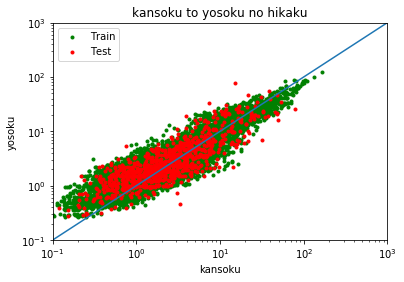

In [20]:
plt.title('kansoku to yosoku no hikaku')
plt.yscale('log')
plt.xscale('log')
plt.scatter(y_train,y1_pred,color='green',marker='.',label='Train')
plt.scatter(y_test,y_pred,color='red',marker='.',label='Test')
plt.xlim(0.1,1000)
plt.ylim(0.1,1000)
plt.plot([0.1, 1000], [0.1, 1000])
plt.legend()
plt.xlabel('kansoku')
plt.ylabel('yosoku')
plt()

# feature importances

Feature ranking:
1. feature 1 (0.627061)
2. feature 0 (0.312160)
3. feature 2 (0.060779)


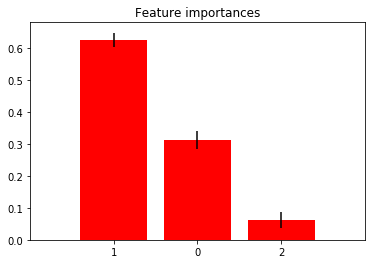

In [21]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

# data view

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [23]:
import seaborn as sns

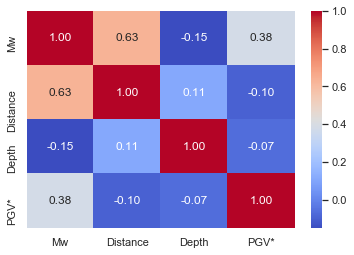

In [24]:
sns.heatmap(dataset[["Mw","Distance","Depth","PGV*"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

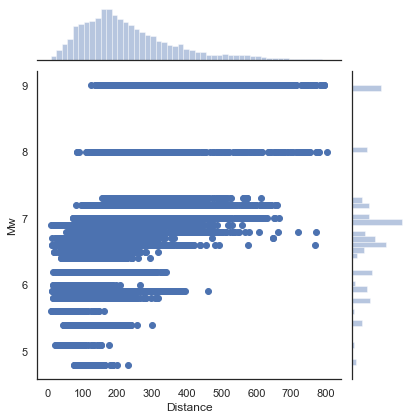

In [25]:
sns.jointplot('Distance', 'Mw', data=dataset)

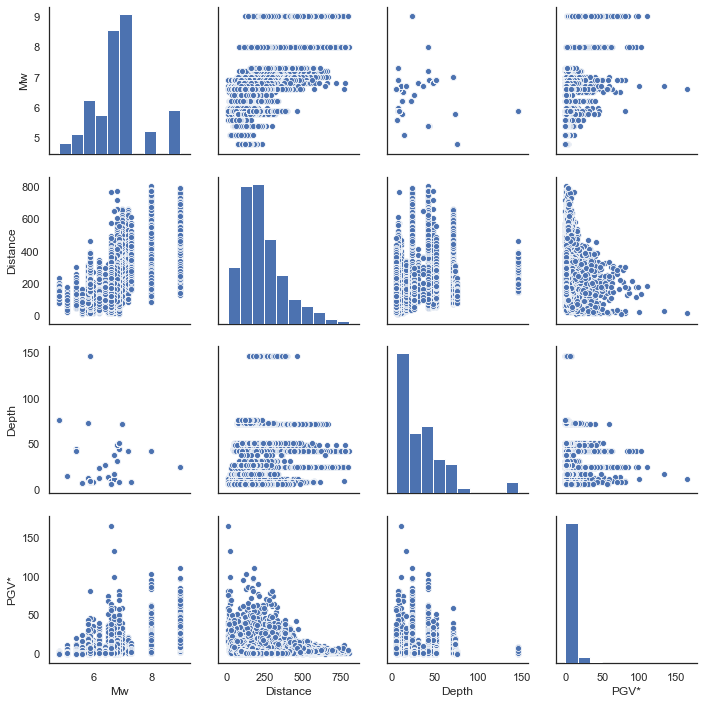

In [26]:
sns.pairplot(data=dataset)

# STANDARD

In [27]:
array=np.arange(501)

In [28]:
dataset8=pd.read_csv('D8M5.csv')

In [29]:
y8=regressor.predict(dataset8)

In [30]:
dataset9=pd.read_csv('D8M7.csv')

In [31]:
y9=regressor.predict(dataset9)

In [32]:
dataset10=pd.read_csv('D8M6.csv')

In [33]:
y10=regressor.predict(dataset10)

In [34]:
type(x)

numpy.ndarray

In [35]:
type(y8)

numpy.ndarray

<function matplotlib.pyplot.show(*args, **kw)>

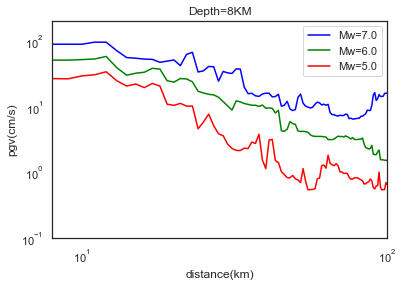

In [36]:
plt.title('Depth=8KM')

plt.plot(array,y9, color='blue', label='Mw=7.0')
plt.plot(array,y10, color='green',label='Mw=6.0')
plt.plot(array,y8, color='red',label='Mw=5.0')

plt.xlim(8,100)
plt.ylim(0.1,200)
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show

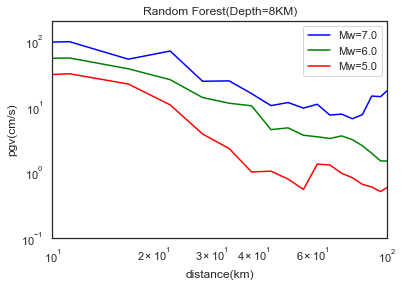

In [37]:
from scipy.interpolate import interp1d
f1 = interp1d(array, y8, kind='cubic')
f2 = interp1d(array, y9, kind='cubic')
f3 = interp1d(array, y10, kind='cubic')
arraynew = np.linspace(0, max(array), 90)
plt.plot(arraynew,f2(arraynew), color='blue', label='Mw=7.0')
plt.plot(arraynew,f3(arraynew), color='green',label='Mw=6.0')
plt.plot(arraynew,f1(arraynew), color='red',label='Mw=5.0')
plt.xlim(10,100)
plt.ylim(0.1,200)
plt.yscale('log')
plt.xscale('log')
plt.title('Random Forest(Depth=8KM)')
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')

plt.legend()

plt.show()

In [38]:
x.shape

(9734, 3)

In [39]:
dataset11=pd.read_csv('D42M5.csv')

In [40]:
y11=regressor.predict(dataset11)

In [41]:
dataset12=pd.read_csv('D42M6.csv')

In [42]:
y12=regressor.predict(dataset12)

In [43]:
dataset13=pd.read_csv('D42M7.csv')

In [44]:
y13=regressor.predict(dataset13)

<function matplotlib.pyplot.show(*args, **kw)>

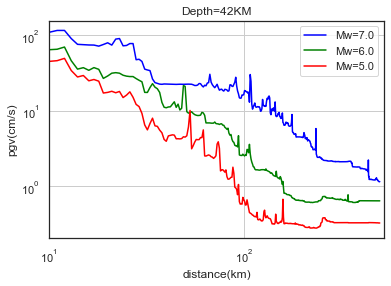

In [45]:
plt.title('Depth=42KM')

plt.plot(array,y13, color='blue', label='Mw=7.0')
plt.plot(array,y12, color='green',label='Mw=6.0')
plt.plot(array,y11, color='red',label='Mw=5.0')


plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.xlim(10,)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

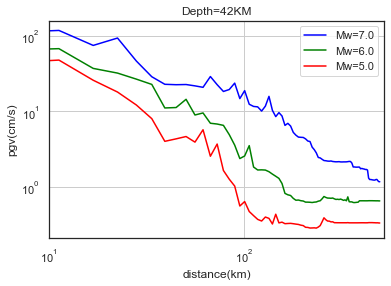

In [46]:
from scipy.interpolate import interp1d
f1 = interp1d(array, y13, kind='cubic')
f2 = interp1d(array, y12, kind='cubic')
f3 = interp1d(array, y11, kind='cubic')
arraynew = np.linspace(0, max(array), 90)
plt.plot(arraynew,f1(arraynew), color='blue',label='Mw=7.0')
plt.plot(arraynew,f2(arraynew), color='green', label='Mw=6.0')
plt.plot(arraynew,f3(arraynew), color='red',label='Mw=5.0')

plt.xlim(10,)
plt.yscale('log')
plt.xscale('log')
plt.title('Depth=42KM')
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')

plt.legend()
plt.grid(True)
plt.show()

# kumamoto0414

In [47]:
kumamoto0414=pd.read_csv('kumamoto.csv')

In [48]:
kumamoto0414.head()

,Mw,Distance,Depth
0,6.5,2.375,11
1,6.5,3.213,11
2,6.5,5.226,11
3,6.5,8.608,11
4,6.5,12.287,11


In [49]:
Ypgvkumamoto0414=regressor.predict(kumamoto0414)

In [50]:
Lkumamoto0414=kumamoto0414.iloc[:,1].values

<function matplotlib.pyplot.show(*args, **kw)>

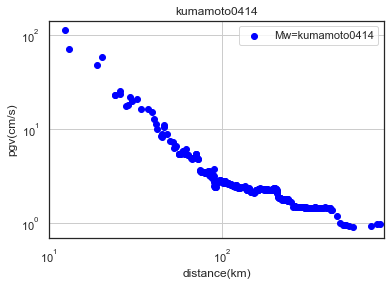

In [51]:
plt.title('kumamoto0414')

plt.scatter(Lkumamoto0414,Ypgvkumamoto0414, color='blue', label='Mw=kumamoto0414')


plt.xlim(10,)
plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [52]:
Kpgvkumamoto0414=pd.read_csv('pgvkumamoto.csv')

<function matplotlib.pyplot.show(*args, **kw)>

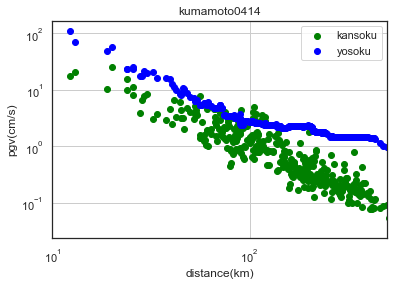

In [53]:
plt.title('kumamoto0414')
plt.scatter(Lkumamoto0414,Kpgvkumamoto0414, color='green', label='kansoku',alpha=1)
plt.scatter(Lkumamoto0414,Ypgvkumamoto0414, color='blue', label='yosoku',alpha=1)


plt.xlim(10,500)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [54]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkumamoto0414,Ypgvkumamoto0414))

Mean Absolute Error 3.209748210662795


In [55]:
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkumamoto0414,Ypgvkumamoto0414))

Mean Squared Error: 81.62919237325374


In [56]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkumamoto0414, Ypgvkumamoto0414)))

Root Mean Squared Error: 9.034887513038209


In [57]:
from sklearn.metrics import r2_score
print('r^2 test data: ', r2_score(Lkumamoto,Ypgvkumamoto))

NameError: name 'Lkumamoto' is not defined

# kumamoto0416

In [58]:
kumamoto0416=pd.read_csv('kumamoto416.csv')

In [59]:
kumamoto0416.head()

,Mw,Distance,Depth
0,7.3,2.069,12
1,7.3,3.880,12
2,7.3,5.653,12
3,7.3,5.931,12
4,7.3,9.474,12


In [60]:
Ypgvkumamoto0416=regressor.predict(kumamoto0416)

In [61]:
Lkumamoto0416=kumamoto0416.iloc[:,1].values

In [62]:
Kpgvkumamoto0416=pd.read_csv('pgvkumamoto416.csv')

<function matplotlib.pyplot.show(*args, **kw)>

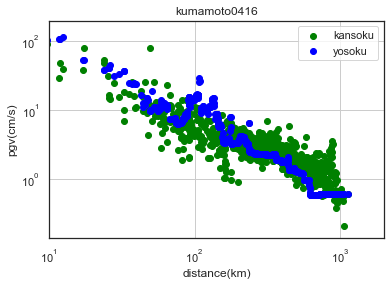

In [63]:
plt.title('kumamoto0416')
plt.scatter(Lkumamoto0416,Kpgvkumamoto0416, color='green', label='kansoku',alpha=1)
plt.scatter(Lkumamoto0416,Ypgvkumamoto0416, color='blue', label='yosoku',alpha=1)


plt.xlim(10,2000)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [64]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkumamoto0416,Ypgvkumamoto0416))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkumamoto0416,Ypgvkumamoto0416))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkumamoto0416, Ypgvkumamoto0416)))

Mean Absolute Error 2.8806629509560917
Mean Squared Error: 56.83054325653396
Root Mean Squared Error: 7.538603534908435


# osaka0618

In [65]:
osaka0618=pd.read_csv('osaka0618.csv')
osaka0618.head()

,Mw,Distance,Depth
0,6.1,13.314,13
1,6.1,13.773,13
2,6.1,16.458,13
3,6.1,17.345,13
4,6.1,17.485,13


In [66]:
Ypgvosaka0618=regressor.predict(osaka0618)

In [67]:
Losaka0618=osaka0618.iloc[:,1].values

In [68]:
Kpgvosaka0618=pd.read_csv('pgvosaka0618.csv')

<function matplotlib.pyplot.show(*args, **kw)>

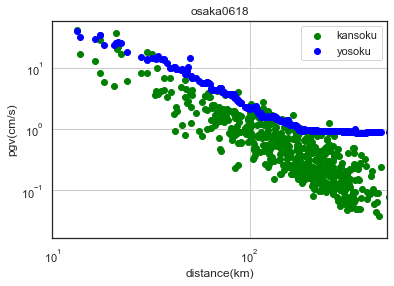

In [69]:
plt.title('osaka0618')
plt.scatter(Losaka0618,Kpgvosaka0618, color='green', label='kansoku',alpha=1)
plt.scatter(Losaka0618,Ypgvosaka0618, color='blue', label='yosoku',alpha=1)


plt.xlim(10,500)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [70]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvosaka0618,Ypgvosaka0618))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvosaka0618,Ypgvosaka0618))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvosaka0618, Ypgvosaka0618)))

Mean Absolute Error 1.5507081475726952
Mean Squared Error: 8.619823353832668
Root Mean Squared Error: 2.9359535680648405


# hokkaido0906

In [71]:
hokkaido0906=pd.read_csv('hokkaido0906.csv')
hokkaido0906.head()

,Mw,Distance,Depth
0,6.7,16.719,35
1,6.7,18.840,35
2,6.7,20.601,35
3,6.7,20.881,35
4,6.7,21.093,35


In [72]:
Ypgvhokkaido0906=regressor.predict(hokkaido0906)

In [73]:
Lhokkaido0906=hokkaido0906.iloc[:,1].values

In [74]:
Kpgvhokkaido0906=pd.read_csv('pgvhokkaido0906.csv')

<function matplotlib.pyplot.show(*args, **kw)>

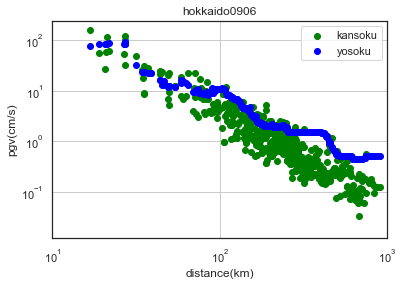

In [75]:
plt.title('hokkaido0906')
plt.scatter(Lhokkaido0906,Kpgvhokkaido0906, color='green', label='kansoku',alpha=1)
plt.scatter(Lhokkaido0906,Ypgvhokkaido0906, color='blue', label='yosoku',alpha=1)


plt.xlim(10,1000)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [76]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvhokkaido0906,Ypgvhokkaido0906))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvhokkaido0906,Ypgvhokkaido0906))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvhokkaido0906, Ypgvhokkaido0906)))

Mean Absolute Error 2.610679205396576
Mean Squared Error: 47.852204713601864
Root Mean Squared Error: 6.917528801067753


# テスト100以下

# hokkaido

In [77]:
hokkaido100=pd.read_csv('h100.csv')

In [79]:
Ypgvhokkaido100=regressor.predict(hokkaido100)

In [80]:
Lhokkaido100=hokkaido100.iloc[:,1].values

In [81]:
Kpgvhokkaido100=pd.read_csv('ph100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

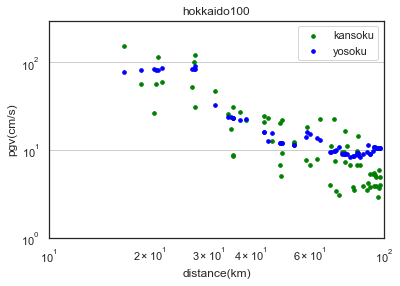

In [84]:
plt.title('hokkaido100')
plt.scatter(Lhokkaido100,Kpgvhokkaido100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lhokkaido100,Ypgvhokkaido100,s=13, color='blue', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,300)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [85]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvhokkaido100,Ypgvhokkaido100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvhokkaido100,Ypgvhokkaido100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvhokkaido100,Ypgvhokkaido100)))

Mean Absolute Error 10.386540025672286
Mean Squared Error: 306.5468720829246
Root Mean Squared Error: 17.508480004926888


# osaka

In [86]:
osaka100=pd.read_csv('o100.csv')

In [87]:
Ypgvosaka100=regressor.predict(osaka100)

In [88]:
Losaka100=osaka100.iloc[:,1].values

In [89]:
Kpgvosaka100=pd.read_csv('po100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

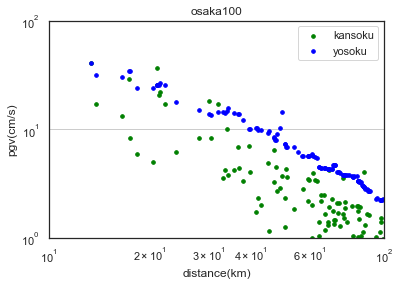

In [92]:
plt.title('osaka100')
plt.scatter(Losaka100,Kpgvosaka100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Losaka100,Ypgvosaka100,s=13, color='blue', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,100)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [91]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvosaka100,Ypgvosaka100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvosaka100,Ypgvosaka100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvosaka100,Ypgvosaka100)))

Mean Absolute Error 4.379750866493081
Mean Squared Error: 36.28588812736284
Root Mean Squared Error: 6.0237768988702465


# kumamoto0416

In [93]:
kh100=pd.read_csv('kh100.csv')

In [94]:
Ypgvkh100=regressor.predict(kh100)

In [95]:
Lkh100=kh100.iloc[:,1].values

In [96]:
Kpgvkh100=pd.read_csv('pkh100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

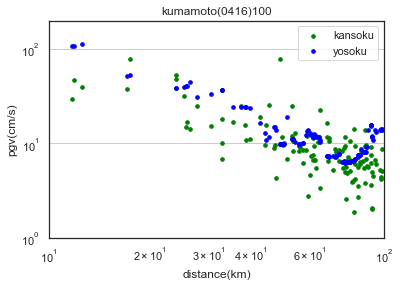

In [98]:
plt.title('kumamoto(0416)100')
plt.scatter(Lkh100,Kpgvkh100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lkh100,Ypgvkh100,s=13, color='blue', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,200)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [99]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkh100,Ypgvkh100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkh100,Ypgvkh100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkh100,Ypgvkh100)))

Mean Absolute Error 8.928664595606586
Mean Squared Error: 268.8777716074753
Root Mean Squared Error: 16.397492845172255


# kumamoto0414

In [100]:
kz100=pd.read_csv('kz100.csv')

In [101]:
Ypgvkz100=regressor.predict(kz100)

In [102]:
Lkz100=kz100.iloc[:,1].values

In [103]:
Kpgvkz100=pd.read_csv('pkz100.csv')

<function matplotlib.pyplot.show(*args, **kw)>

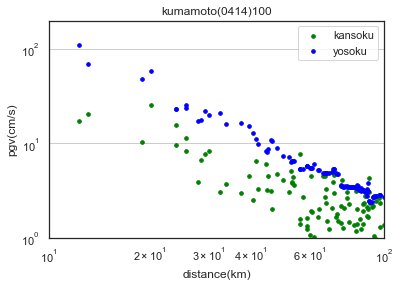

In [104]:
plt.title('kumamoto(0414)100')
plt.scatter(Lkz100,Kpgvkz100,s=13, color='green', label='kansoku',alpha=1)
plt.scatter(Lkz100,Ypgvkz100,s=13, color='blue', label='yosoku',alpha=1)

plt.xlim(10,100)
plt.ylim(1,200)

plt.xlabel('distance(km)')
plt.ylabel('pgv(cm/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show

In [105]:
print('Mean Absolute Error',metrics.mean_absolute_error(Kpgvkz100,Ypgvkz100))
print('Mean Squared Error:', metrics.mean_squared_error(Kpgvkz100,Ypgvkz100))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Kpgvkz100,Ypgvkz100)))

Mean Absolute Error 6.652918518167204
Mean Squared Error: 233.06928023498472
Root Mean Squared Error: 15.266606703356995
